# Name : Mohit Ram Sharma
# Roll : 224161018

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
data=pd.read_csv("discriminant.csv",delimiter=',')

In [211]:
x=np.array(data.iloc[:,:2])
y=np.array(data.iloc[:,-1])

In [212]:
x=x.T
y=y.reshape(1,400)

In [213]:
n=x.shape[1]
d=x.shape[0]

In [214]:
# Weights
A=np.random.rand(d,d)
B=np.random.rand(1,d)
C=np.random.rand(1,1)

In [215]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [216]:
def forward(x):
    value=((np.sum((x)*(A@x),axis=0)).reshape(1,n)+(B@x).reshape(1,n)+C)
    return sigmoid(value)

In [217]:
# Used for calculating derivative wrt A
x_2=np.zeros((2,2,400))
for i in range(n):
    xi=x[:,i].reshape(2,1)
    x_2[:,:,i]=xi@xi.T

In [218]:
# Gradient descent to Update weights using Mean Square Error 
lr=0.01
iterations=20000
for i in range(iterations):
    y_hat=forward(x)
    derivative=(-(y-y_hat)*y_hat*(1-y_hat))
    grad_C=np.mean(derivative)
    grad_B=np.mean(derivative@x.T,axis=0)
    grad_A=(x_2*derivative).mean(axis=2)
    A=A-lr*grad_A
    B=B-lr*grad_B
    C=C-lr*grad_C

In [219]:
predictions=np.round(forward(x))

In [220]:
accuracy=np.sum(predictions==y)/400
accuracy

0.9475

In [221]:
indices_0=y==0
indices_1=y==1

In [222]:
# For drawing decision boundary
X=[]
count=0
while (len(X))<100:
    point=np.random.uniform(-4,12,(2,1))
    if (((np.sum((point)*(A@point),axis=0)).reshape(1,1)+(B@point).reshape(1,1)+C) > -0.05) & (((np.sum((point)*(A@point),axis=0)).reshape(1,1)+(B@point).reshape(1,1)+C) < 0.05):
        X.append(point)
    count+=1
    if count==100000:
        break
X=np.array(X).reshape(np.array(X).shape[0],2)

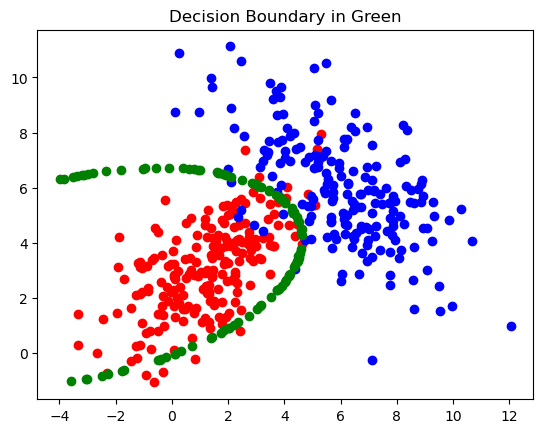

In [224]:
plt.scatter(x[0,indices_0[0]],x[1,indices_0[0]],color='red')
plt.scatter(x[0,indices_1[0]],x[1,indices_1[0]],color='blue')
plt.scatter(X[:,0],X[:,1],color='green')# Decision Boundary in green
plt.title("Decision Boundary in Green")
plt.show()

# Observations  
* The data is not linearly separable
* Hence we used non-linear activation (sigmoid) to improve the performance of the model
* Still the model was not able to classify points correctly which lied within cluster of points of opposite label.
* The model due to its non-linearty was able to separate the cluster red points from the blue one.
* The accuracy of the model on the test achieved is 0.9475(Can Change if you run again)